In [25]:
import numpy as np 
import pandas as pd

from keras.models import Sequential
from keras.layers  import Convolution2D
from keras.layers  import Flatten
from keras.layers  import Dense
from keras.layers  import MaxPooling2D

import os;

In [17]:
train = 'Dataset/Train/'
test='Dataset/Test/'

In [18]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=6,activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [19]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining..")
training_set = train_datagen.flow_from_directory(train,
                                                target_size=(64,64),
                                                batch_size=12,
                                                class_mode='categorical')
test_set = test_datagen.flow_from_directory(test,
                                           target_size=(64,64),
                                           batch_size=12,
                                           class_mode='categorical')


Training..
Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
Model = classifier.fit(training_set,
                      steps_per_epoch=100,
                      epochs=50,
                      validation_data=test_set,
                      validation_steps=100)

In [21]:
from keras.models import load_model
mod = load_model('fresh1.h5')
mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 32)               

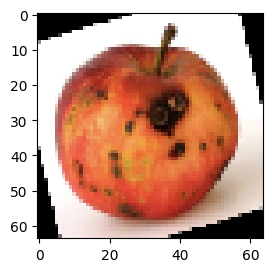

1/1 [==============================] - 0s 25ms/step
result:  [[0. 0. 1. 0. 0. 0.]]
the prediction is  Fresh Orange


In [24]:
from tensorflow.keras.utils import img_to_array,  load_img

classes = ['Fresh Apple','Fresh Banana','Fresh Orange','Rotten Apple','Rotten Banana','Rotten Orange']
#classes = ['Fresh','Fresh','Fresh','Rotten','Rotten','Rotten']

filename="Dataset/Train/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.37.43 PM.png"
test_image = load_img(filename,target_size=(64,64))
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.axis("on")
plt.show()
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = mod.predict(test_image)
print("result: ",result)
result1 = result[0]

for i in range(6):
            if result1[i] == 1.:
                break;
prediction = classes[i]
print("the prediction is ", prediction)        